<a href="https://colab.research.google.com/github/NikolaiTeslovich/sSNOM/blob/master/sSNOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
# import necessary Python packages
import os
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# print message after packages imported successfully
print("import of packages successful")


import of packages successful


In [192]:
#check working directory directory
print(os.getcwd())

/content


In [0]:
# load the text file
A = np.loadtxt(fname = "/content/M0A.txt")
# load a second text file
B = np.loadtxt(fname = "/content/R-M0A.txt")
# print that the files were successfully imported

In [0]:
# minimize the dimensions of each array
np.squeeze(A)
np.squeeze(B)

In [0]:
# reverse each line of the array R-MOA
B_flip = np.fliplr(B)

In [0]:
# layer rows of the forward and reverse(flipped) files in alternating order
C = np.zeros((300,150))
C[0::2] = A
C[1::2] = B_flip
C = np.array(C)

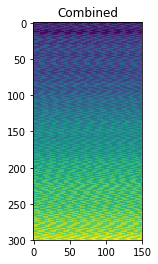

In [182]:
# diplay the result visually
plt.imshow(C, interpolation='none')
plt.title('Combined')
plt.show()

In [0]:
# flatten the resultant array
C_flat = C.flatten()

In [0]:
# normalize all the values in relation to the smallest
C_min = np.amin(C)
C_flat_min = C_flat - C_min

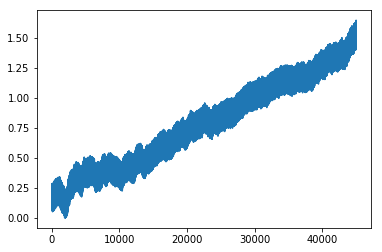

In [161]:
# graph the difference in signal in relation to each pixel
plt.plot(C_flat)
plt.show()

In [0]:
# run an FFT on the combined data
C_FFT = np.fft.fft(C_flat_min)

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


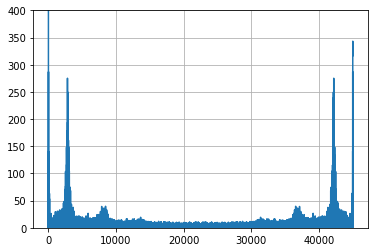

In [185]:
# graphing the real part of the data
plt.plot(C_FFT)
plt.ylim(0, 400)
plt.grid()
plt.show()

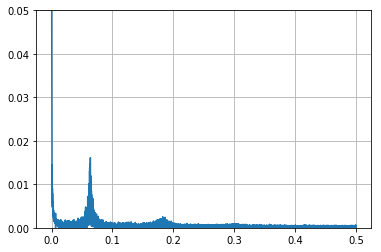

In [189]:
# another graph og the FFT, not quite sure how to do this yet

# sample rate, for the corresponding amount of pixels
N = 45000 

plt.ylim(0, 0.05)
T = 1
x = np.linspace(0.0, N*T, N)
yf = C_FFT
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

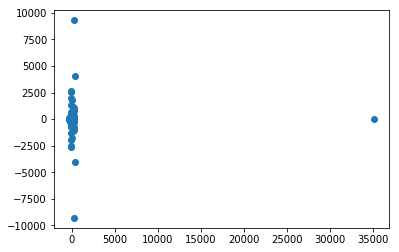

In [202]:
# plot imaginary vs real data from the FFT
X = [C_FFT.real]
Y = [C_FFT.imag]
plt.scatter(X, Y)
plt.show()